In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [140]:
df_cholesterol = pd.read_csv('./datasets/cholesterol_dataset.csv')

In [141]:
# Check file
df_cholesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1000 non-null   int64  
 1   Blood Group     996 non-null    object 
 2   Smoker          997 non-null    object 
 3   Activity Level  996 non-null    object 
 4   Age             997 non-null    float64
 5   Weight          997 non-null    float64
 6   Height          997 non-null    float64
 7   Cholesterol     1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [142]:
# Remove id column
df_cholesterol.drop(columns=['Id'], axis=1, inplace=True)

In [143]:
# Rename columns
df_cholesterol.columns = [
  'blood_group',
  'smoker',
  'activity_level',
  'age',
  'weight',
  'height',
  'cholesterol_level'
]

In [144]:
# Copy DF to DF EDA
df_cholesterol_eda = df_cholesterol.copy()

In [145]:
# Copy DF to DF Bucketing
df_cholesterol_bucketing = df_cholesterol.copy()

In [146]:
# Visualize the data
df_cholesterol_eda.head(10)

,blood_group,smoker,activity_level,age,weight,height,cholesterol_level
0,B,Yes,Low,33.0,85.1,186.0,199.63
1,A,No,Moderate,68.0,105.0,184.0,236.98
2,O,No,High,25.0,64.8,180.0,161.79
3,A,No,High,43.0,120.2,167.0,336.24
4,AB,No,Low,79.0,88.5,175.0,226.23
5,B,No,Low,68.0,66.8,170.0,185.31
6,A,Yes,Low,60.0,117.3,181.0,289.33
7,O,Yes,Moderate,35.0,86.9,174.0,216.48
8,O,No,Low,62.0,81.3,166.0,235.30
9,B,Yes,High,44.0,32.7,165.0,97.79


In [147]:
df_cholesterol_eda.activity_level.unique()

array(['Low', 'Moderate', 'High', nan], dtype=object)

In [148]:
# Detect missing values
df_cholesterol_eda.isna().sum()

blood_group          4
smoker               3
activity_level       4
age                  3
weight               3
height               3
cholesterol_level    0
dtype: int64

In [149]:
# Statistical summary
df_cholesterol_eda.describe()

,age,weight,height,cholesterol_level
count,997.000000,997.000000,997.000000,1000.000000
mean,49.206620,76.496690,174.889669,199.453260
std,17.476704,21.439132,8.844703,50.625152
min,20.000000,15.400000,160.000000,36.260000
25%,34.000000,61.700000,167.000000,166.345000
50%,49.000000,75.500000,175.000000,199.455000
75%,65.000000,90.200000,183.000000,233.785000
max,79.000000,158.100000,190.000000,372.670000


In [150]:
# Distribution of categorical variables
mode_blood_group = df_cholesterol_eda['blood_group'].mode()
mode_smoker = df_cholesterol_eda['smoker'].mode()
mode_activity_level = df_cholesterol_eda['activity_level'].mode()

# Distribution of numerical variables
median_age = df_cholesterol_eda['age'].median()
median_weight = df_cholesterol_eda['weight'].median()
median_height = df_cholesterol_eda['height'].median()

In [151]:
# Replace missing values
df_cholesterol_eda.fillna(value={'blood_group': mode_blood_group[0], 'smoker': mode_smoker[0], 'activity_level': mode_activity_level[0], 'age': median_age, 'weight': median_weight, 'height': median_height}, inplace=True)

In [152]:
# Convert age and height to integer
df_cholesterol_eda.age = df_cholesterol_eda.age.astype(int)
df_cholesterol_eda.height = df_cholesterol_eda.height.astype(int)

# Dataframe Structure
df_cholesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   blood_group        1000 non-null   object 
 1   smoker             1000 non-null   object 
 2   activity_level     1000 non-null   object 
 3   age                1000 non-null   int64  
 4   weight             1000 non-null   float64
 5   height             1000 non-null   int64  
 6   cholesterol_level  1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


<Axes: xlabel='age'>

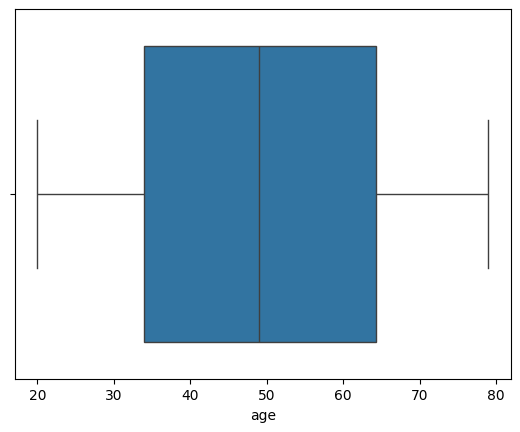

In [153]:
# Detect Outliers
sns.boxplot(data=df_cholesterol_eda, x='age')

<Axes: xlabel='weight'>

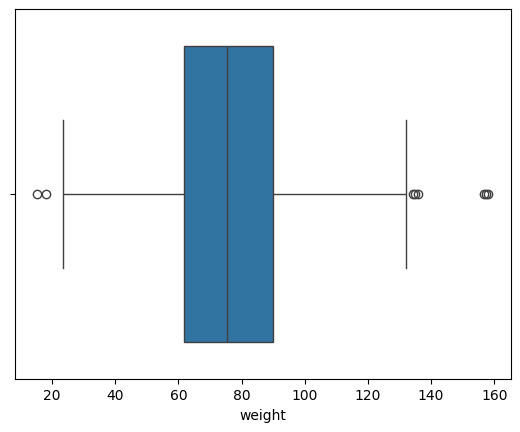

In [154]:
sns.boxplot(data=df_cholesterol_eda, x='weight')

In [155]:
# Filter outliers and remove them
# Filter
df_cholesterol_eda[df_cholesterol_eda['weight'] < 40]
# Remove
df_cholesterol_eda.drop(df_cholesterol_eda[df_cholesterol_eda['weight'] < 40].index, axis=0, inplace=True)

### Graphical Analysis

<Axes: xlabel='blood_group', ylabel='cholesterol_level'>

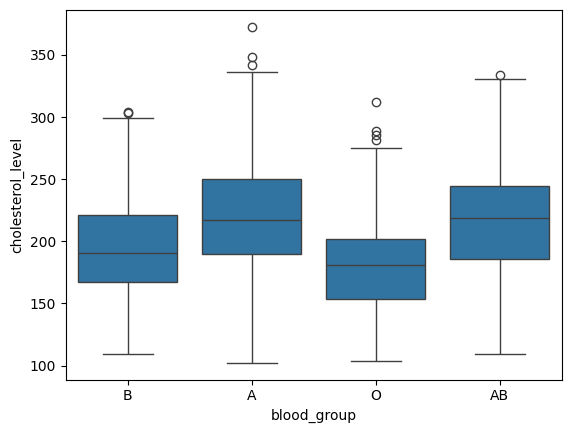

In [156]:
# Correlate the categorical variables
sns.boxplot(data=df_cholesterol_eda, x='blood_group', y='cholesterol_level')

<Axes: xlabel='smoker', ylabel='cholesterol_level'>

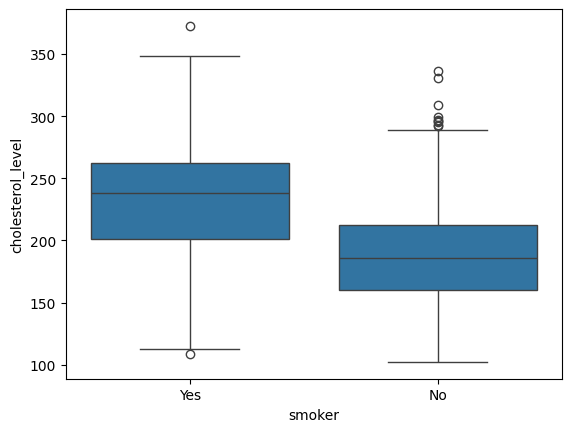

In [157]:
sns.boxplot(data=df_cholesterol_eda, x='smoker', y='cholesterol_level')

<Axes: xlabel='activity_level', ylabel='cholesterol_level'>

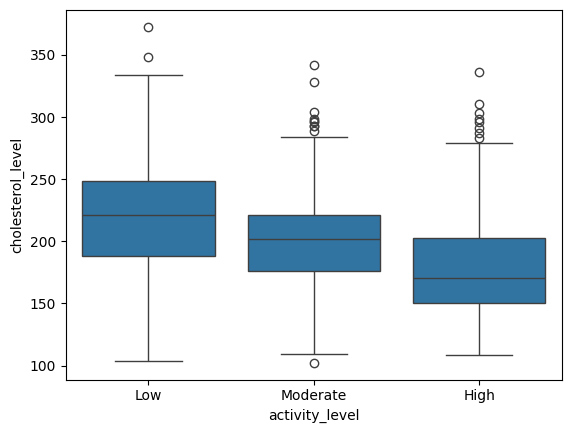

In [158]:
sns.boxplot(data=df_cholesterol_eda, x='activity_level', y='cholesterol_level')

<Axes: xlabel='age', ylabel='cholesterol_level'>

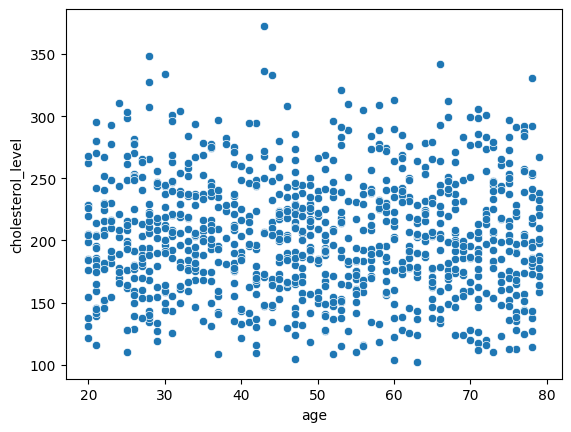

In [159]:
# Correlate the numerical variables with the cholesterol_level
sns.scatterplot(data=df_cholesterol_eda, x='age', y='cholesterol_level')

<Axes: xlabel='weight', ylabel='cholesterol_level'>

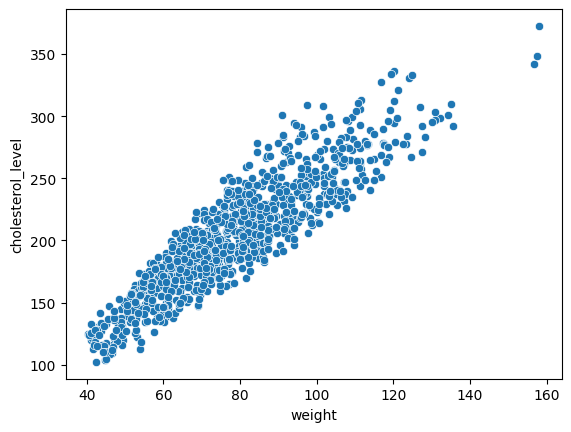

In [160]:
# Correlate the numerical variables with the cholesterol_level
sns.scatterplot(data=df_cholesterol_eda, x='weight', y='cholesterol_level')

<Axes: xlabel='height', ylabel='cholesterol_level'>

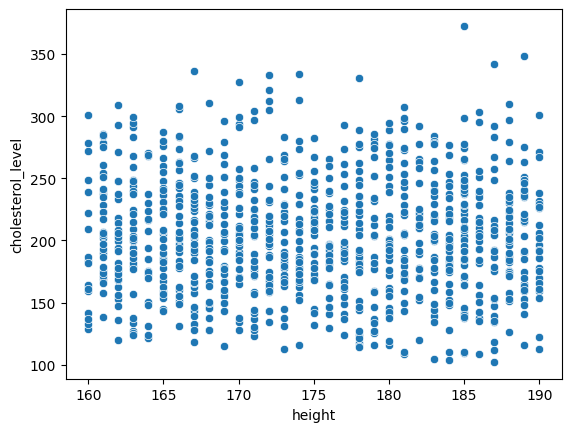

In [161]:
# Correlate the numerical variables with the cholesterol_level
sns.scatterplot(data=df_cholesterol_eda, x='height', y='cholesterol_level')

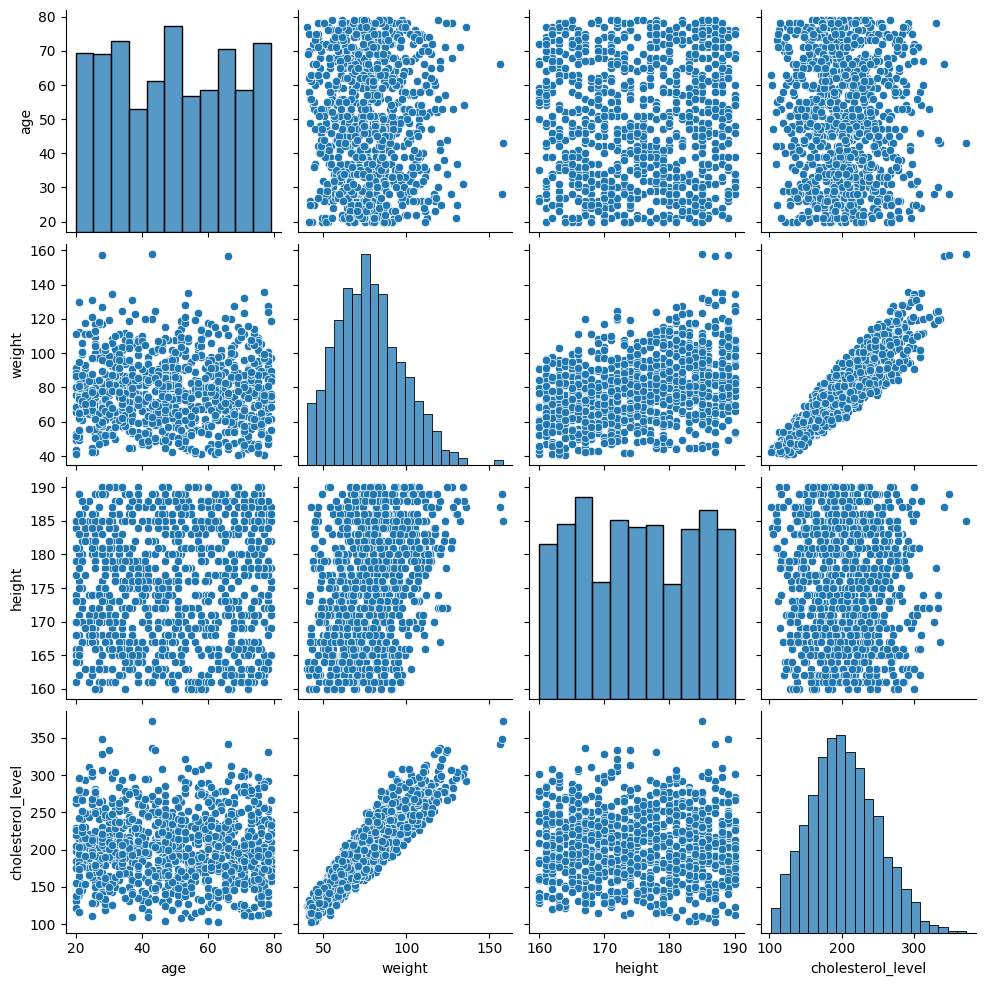

In [162]:
sns.pairplot(df_cholesterol_eda)

In [163]:
# Convert categorical variables to numerical, using Pandas's One-Hot Encoding
df_cholesterol_eda = pd.get_dummies(df_cholesterol_eda, columns=['blood_group', 'smoker'], dtype='int64')

In [164]:
df_cholesterol_eda.head(10)

,activity_level,age,weight,height,cholesterol_level,blood_group_A,blood_group_AB,blood_group_B,blood_group_O,smoker_No,smoker_Yes
0,Low,33,85.1,186,199.63,0,0,1,0,0,1
1,Moderate,68,105.0,184,236.98,1,0,0,0,1,0
2,High,25,64.8,180,161.79,0,0,0,1,1,0
3,High,43,120.2,167,336.24,1,0,0,0,1,0
4,Low,79,88.5,175,226.23,0,1,0,0,1,0
5,Low,68,66.8,170,185.31,0,0,1,0,1,0
6,Low,60,117.3,181,289.33,1,0,0,0,0,1
7,Moderate,35,86.9,174,216.48,0,0,0,1,0,1
8,Low,62,81.3,166,235.30,0,0,0,1,1,0
10,Low,57,123.6,183,283.87,1,0,0,0,0,1


In [165]:
# Convert ordinal categorical variables to numerical, using Pandas's Factorize
df_cholesterol_eda['activity_level'] = pd.factorize(df_cholesterol_eda['activity_level'])[0] + 1


<Axes: >

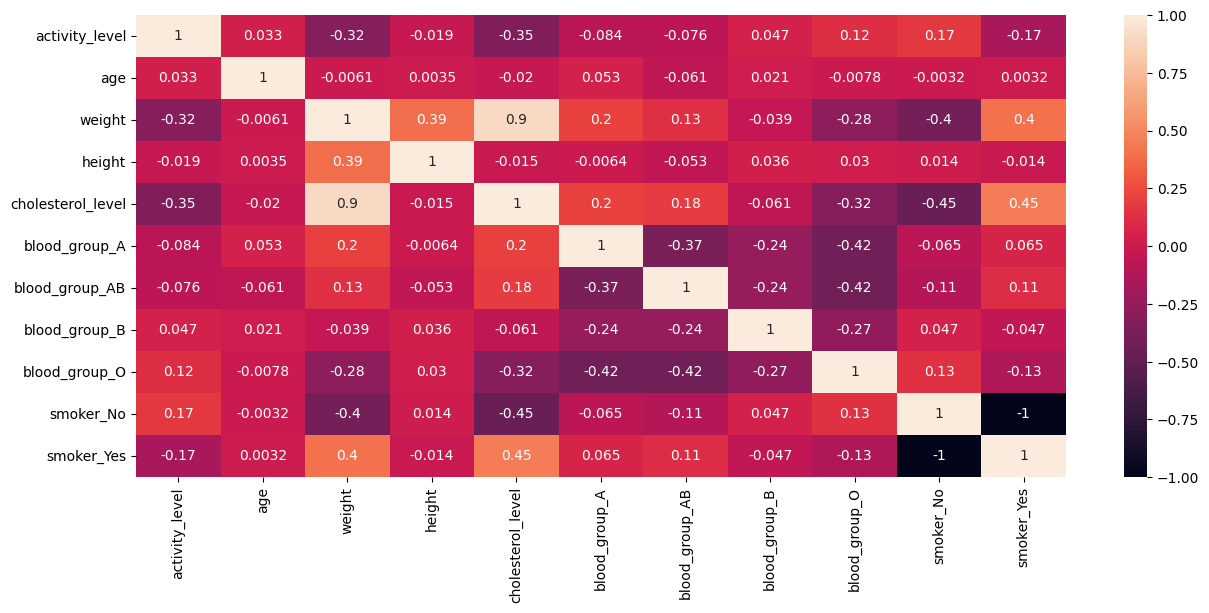

In [166]:
# Correlation Heatmap of the dataset
plt.figure(figsize=(15,6))
sns.heatmap(df_cholesterol_eda.corr(), vmin=-1, vmax=1, annot=True)

<Axes: >

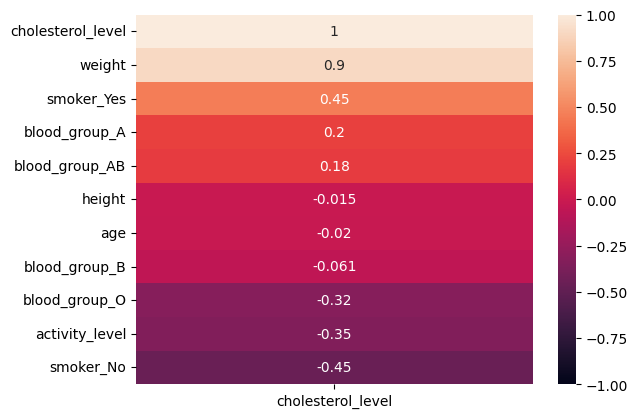

In [167]:
# Ranking format, with only correlation with cholesterol_level (correlational level)
sns.heatmap(df_cholesterol_eda.corr()[['cholesterol_level']].sort_values(by='cholesterol_level', ascending=False), vmin=-1, vmax=1, annot=True)

In [168]:
# Bucketing - Age
age_bins = [20, 30, 40, 50, 60, 70, 80]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df_cholesterol_bucketing['age_scale'] = pd.cut(x=df_cholesterol_bucketing['age'], bins=age_bins, labels=age_labels, include_lowest=True)


In [169]:
df_cholesterol_bucketing.head(10)

,blood_group,smoker,activity_level,age,weight,height,cholesterol_level,age_scale
0,B,Yes,Low,33.0,85.1,186.0,199.63,30-39
1,A,No,Moderate,68.0,105.0,184.0,236.98,60-69
2,O,No,High,25.0,64.8,180.0,161.79,20-29
3,A,No,High,43.0,120.2,167.0,336.24,40-49
4,AB,No,Low,79.0,88.5,175.0,226.23,70-79
5,B,No,Low,68.0,66.8,170.0,185.31,60-69
6,A,Yes,Low,60.0,117.3,181.0,289.33,50-59
7,O,Yes,Moderate,35.0,86.9,174.0,216.48,30-39
8,O,No,Low,62.0,81.3,166.0,235.30,60-69
9,B,Yes,High,44.0,32.7,165.0,97.79,40-49


<Axes: xlabel='age_scale', ylabel='cholesterol_level'>

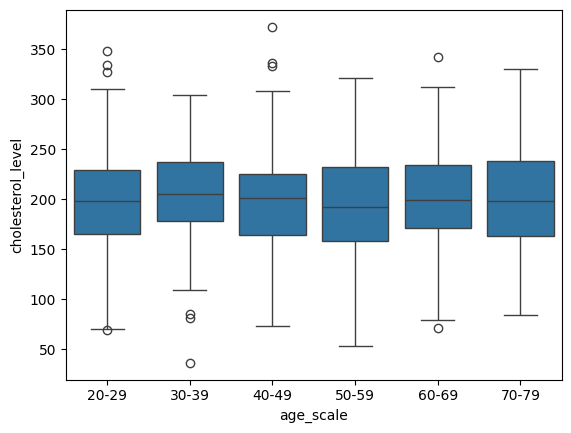

In [170]:
sns.boxplot(data=df_cholesterol_bucketing, x='age_scale', y='cholesterol_level')

In [171]:
# Bucketing - Weight
weight_bins = [40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160]
weight_labels = ['40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110-119', '120-129', '130-139', '140-149', '150-159']
df_cholesterol_bucketing['weight_scale'] = pd.cut(x=df_cholesterol_bucketing['weight'], bins=weight_bins, labels=weight_labels, include_lowest=True)

<Axes: xlabel='weight_scale', ylabel='cholesterol_level'>

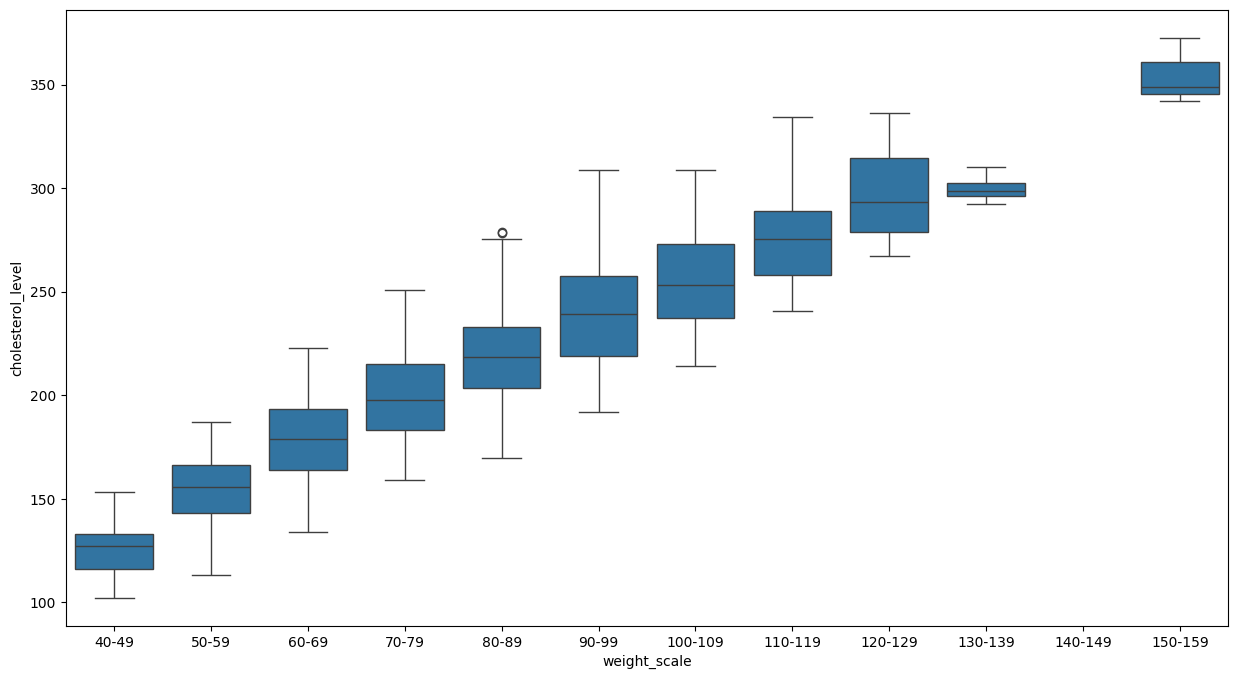

In [172]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_cholesterol_bucketing, x='weight_scale', y='cholesterol_level')

### Model Training

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

In [174]:
# Create Training Dataset and Test Dataset
# Remove Outliers first
df_cholesterol.drop(df_cholesterol[df_cholesterol['weight'] < 40].index, axis=0, inplace=True)

X = df_cholesterol.drop(columns=['cholesterol_level'], axis=1)
y = df_cholesterol['cholesterol_level']

In [175]:
# Split the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [176]:
# Pipeline
# Impute mode for categorical variables -> blood_group, smoker, activity_level
# Impute median for numerical variables -> age, weight, height
# Standard numerical variables -> age, weight, height
# OneHotEncode for the nominal categorical variables -> blood_group, smoker
# OrdinalEncode for the ordinal categorical variables -> activity_level

# Columns Names
categorical_columns = ['blood_group', 'smoker']
numerics_columns = ['age', 'weight', 'height']
ordinal_columns = ['activity_level']

In [177]:
# Categorical Transformer
categorical_transformer = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='most_frequent')),
  ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

In [178]:
# Ordinal Transformer
ordinal_transformer = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='most_frequent')),
  ('ordinal', OrdinalEncoder(categories=[['Low', 'Moderate', 'High']], handle_unknown='error')),
])

In [179]:
# Numerical Transformer
numerical_transformer = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='median')),
  ('scaler', StandardScaler()),
])

In [180]:
# Create a column transformer that will encapsulate all the transformers
preprocessor = ColumnTransformer(
  transformers=[
    ('num', numerical_transformer, numerics_columns),
    ('cat', categorical_transformer, categorical_columns),
    ('ord', ordinal_transformer, ordinal_columns),
  ]
)

In [181]:
# Main Pipeline - preprocessing and training
reg_model = Pipeline(steps=[('preprocessor', preprocessor), ('model', LinearRegression())])

In [182]:
# Train the model
reg_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'weight', 'height']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['blood_group', 'smoker']),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Moderate',
                                                                                               'High']]))]),
                                                  ['activity_level'])])),
                ('model', LinearRegression())])

### Metrics Analysis

In [183]:
# Create Prediction
y_pred = reg_model.predict(X_test)

In [184]:
# Calculate R2 Score
r2_score(y_test, y_pred)

0.9594250724093464

In [185]:
# Calculate MAE (Mean Absolute Error)
mean_absolute_error(y_test, y_pred)

7.313838031022507

In [186]:
# Calculate RMSE (Root Mean Squared Error)
root_mean_squared_error(y_test, y_pred)

9.097649246487036

### Residual Analysis

In [187]:
# Calculate the Residuals
residuals = y_test - y_pred

In [188]:
# Transform the residuals to the stardard scale
# (X - mean) / std
from scipy.stats import zscore
residuals_std = zscore(residuals)

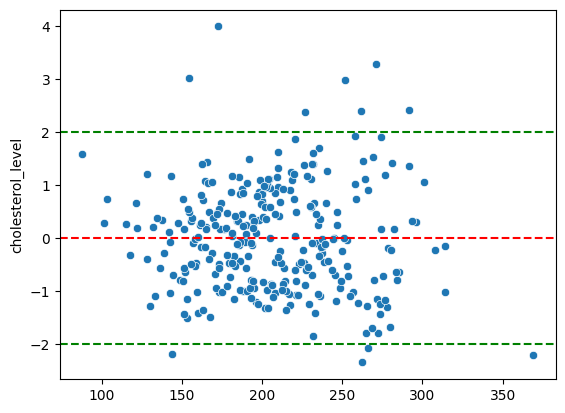

In [189]:
# Verify the linearity of the residuals: Values are between -2 and 2
# Verify homocedasticity: The residuals are spread equally along the line
sns.scatterplot(x=y_pred, y=residuals_std)
plt.axhline(y=0, color='r', linestyle='--')

plt.axhline(y=2, color='g', linestyle='--')
plt.axhline(y=-2, color='g', linestyle='--')

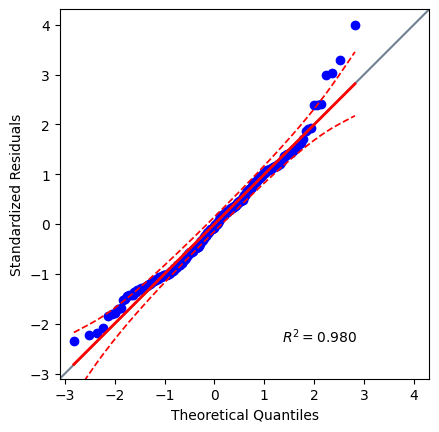

In [190]:
# Check if the residuals are normally distributed
# QQ Plot
import pingouin as pg
pg.qqplot(residuals_std, dist='norm', confidence=0.95)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.show()

In [191]:
# Normality Test
from scipy.stats import shapiro, kstest, anderson
from statsmodels.stats.diagnostic import lilliefors, het_goldfeldquandt

# Shapiro-Wilk Test
stat_shapiro, p_value_shapiro = shapiro(residuals)
print(f'Shapiro-Wilk Test: {stat_shapiro}, {p_value_shapiro}')

Shapiro-Wilk Test: 0.9807737729720756, 0.0006268860444496802


In [192]:
# Kolmogorov-Smirnov Test
stat_kstest, p_value_kstest = kstest(residuals, 'norm')
print(f'Kolmogorov-Smirnov Test: {stat_kstest}, {p_value_kstest}')

Kolmogorov-Smirnov Test: 0.42455920998485785, 8.925833190901912e-48


In [193]:
# Lilliefors Test
stat_lilliefors, p_value_lilliefors = lilliefors(residuals, dist='norm', pvalmethod='table')
print(f'Lilliefors Test: {stat_lilliefors}, {p_value_lilliefors}')


Lilliefors Test: 0.04955371030192879, 0.1253332372073659


In [194]:
# Anderson-Darling Test
stat_anderson, critical_and, significance_and = anderson(residuals, dist='norm')
print(f'Test Statistic: {stat_anderson}, Critical Value: {critical_and[2]}')

Test Statistic: 0.9169275158490109, Critical Value: 0.776


In [195]:
# Goldfeld-Quandt Test - Homocedasticity
pipe = Pipeline(steps=[('preprocessor', preprocessor)])
X_test_transformed = pipe.fit_transform(X_test)
X_test_transformed

array([[-1.44340738,  0.22608781, -0.58669129, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.28157488, -1.20886474, -1.05685776, ...,  1.        ,
         0.        ,  0.        ],
       [-1.10973608, -0.84754575, -0.35160806, ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [ 0.00250157, -1.09014564, -1.52702423, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.28056099,  0.17447081, -0.35160806, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.72545605, -1.65277092, -1.17439938, ...,  0.        ,
         1.        ,  0.        ]])

In [196]:
gf_test = het_goldfeldquandt(residuals, X_test_transformed)
stat_goldfeld = gf_test[0]
p_value_goldfeld = gf_test[1]
print(f'Goldfeld-Quandt Test: {stat_goldfeld}, {p_value_goldfeld}')

Goldfeld-Quandt Test: 0.6716135765253548, 0.9893959472385481


### Create Individual Predictions

In [197]:
individual_prediction = {
  'blood_group': 'O',
  'smoker': 'no',
  'activity_level': 'High',
  'age': 40,
  'weight': 70,
  'height': 180
}

sample_df = pd.DataFrame(individual_prediction, index=[1])
sample_df

,blood_group,smoker,activity_level,age,weight,height
1,O,no,High,40,70,180


In [198]:
# Predict
reg_model.predict(sample_df)

array([166.42146657])

In [199]:
import joblib
# Save the model
joblib.dump(reg_model, './cholesterol_model.pkl')

['./cholesterol_model.pkl']